In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import networkx as nx

In [3]:
sns.set()

In [4]:
path1 = '/home/mcalmeida/machine-learning/projects/neoway-case/data/conexoes_espec.csv'

In [5]:
df_conexoes = pd.read_csv(path1,sep=';')
df_conexoes.head()

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN


In [6]:
df_conexoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [7]:
print(f"A taxa de valores faltantes para a coluna prov_V1_V2 é {np.sum(df_conexoes['prob_V1_V2'].isna())/len(df_conexoes)*100:.2f}%")

A taxa de valores faltantes para a coluna prov_V1_V2 é 50.00%


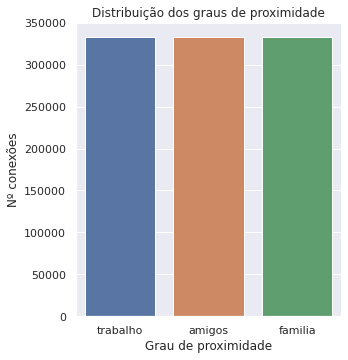

In [8]:
sns.catplot(
    data=df_conexoes, 
    x='grau', 
    kind='count'
)
_ = plt.xlabel("Grau de proximidade")
# _ = plt.xticks(rotation=45)
_ = plt.ylabel("Nº conexões")
_ = plt.title("Distribuição dos graus de proximidade")
plt.show();

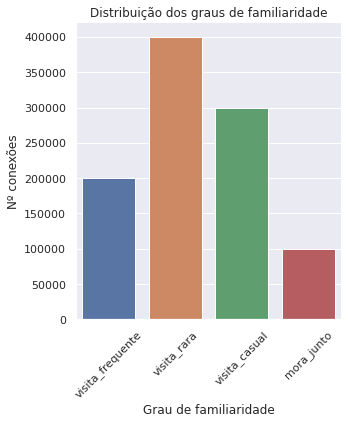

In [9]:
sns.catplot(
    data=df_conexoes, 
    x='proximidade', 
    kind='count'
)
_ = plt.xlabel("Grau de familiaridade")
_ = plt.xticks(rotation=45)
_ = plt.ylabel("Nº conexões")
_ = plt.title("Distribuição dos graus de familiaridade")
plt.show();

In [10]:
step = 30
pt1 = df_conexoes[:step]
pt_intermed = df_conexoes[:100]
pt2 = df_conexoes[step:2*step]
pt3 = df_conexoes[2*step:3*step]

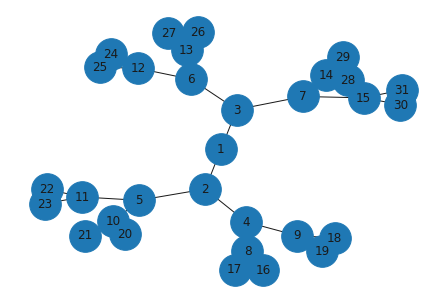

In [11]:
G = nx.from_pandas_edgelist(
    pt1, 
    "V1", 
    "V2", 
    create_using=nx.Graph()
)

# plota o grafo
nx.draw(
    G, 
    with_labels=True, 
    node_size = 1000
)
plt.show()

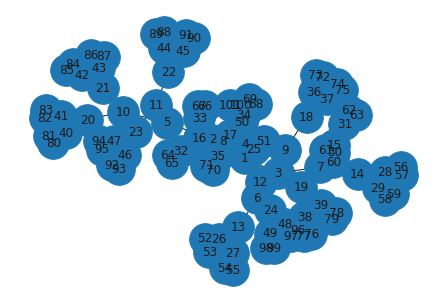

In [12]:
G = nx.from_pandas_edgelist(
    pt_intermed, 
    "V1", 
    "V2", 
    create_using=nx.Graph()
)

# plota o grafo
nx.draw(
    G, 
    with_labels=True, 
    node_size = 1000
)
plt.show()

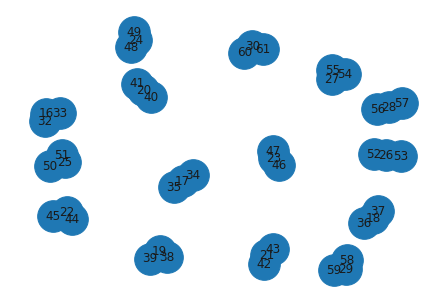

In [13]:
G = nx.from_pandas_edgelist(
    pt2, 
    "V1", 
    "V2", 
    create_using=nx.Graph()
)

# plota o grafo
nx.draw(
    G, 
    with_labels=True, 
    node_size = 1000
)
plt.show()

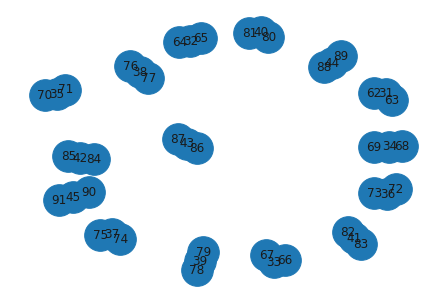

In [14]:
G = nx.from_pandas_edgelist(
    pt3, 
    "V1", 
    "V2", 
    create_using=nx.Graph()
)

# plota o grafo
nx.draw(
    G, 
    with_labels=True, 
    node_size = 1000
)
plt.show()

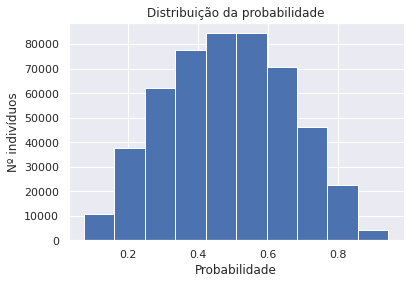

In [15]:
probabilidade = df_conexoes['prob_V1_V2']
_ = plt.hist(probabilidade)
_ = plt.xlabel("Probabilidade")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição da probabilidade")
plt.show();

In [20]:
df_conexoes[(df_conexoes['prob_V1_V2'] > 1) | (df_conexoes['prob_V1_V2'] <0)]

,V1,V2,grau,proximidade,prob_V1_V2
